
**Membuat Model NLP**
*   Nama : Salimah Mahdiyyah
*   Email : salimahdiyyah03@gmail.com
*   Link Dataset : https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset
*   Sumber : Kaggle





In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset-SA.csv')
df = df.drop(columns=['product_name', 'product_price', 'Rate', 'Review'])
df

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral
...,...,...
205047,good product,positive
205048,nice,positive
205049,very nice and fast delivery,positive
205050,awesome product,positive


In [10]:
sen = pd.get_dummies(df.Sentiment)
df = pd.concat([df, sen], axis=1)
df = df.drop(columns='Sentiment')

df

,Summary,negative,neutral,positive
0,great cooler excellent air flow and for this p...,0,0,1
1,best budget 2 fit cooler nice cooling,0,0,1
2,the quality is good but the power of air is de...,0,0,1
3,very bad product its a only a fan,1,0,0
4,ok ok product,0,1,0
...,...,...,...,...
205047,good product,0,0,1
205048,nice,0,0,1
205049,very nice and fast delivery,0,0,1
205050,awesome product,0,0,1


In [11]:
review = df['Summary'].values
label = df[['negative', 'neutral', 'positive']].values

review

array(['great cooler excellent air flow and for this price its so amazing and unbelievablejust love it',
       'best budget 2 fit cooler nice cooling',
       'the quality is good but the power of air is decent', ...,
       'very nice and fast delivery', 'awesome product',
       'very good but mixing bowl not included is one disappointmentand soup bowl is small in size'],
      dtype=object)

In [12]:
label

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [19]:
from sklearn.model_selection import train_test_split

sum = df['Summary'].values
y = df[['negative', 'neutral', 'positive']].values
sum_train, sum_test, y_train, y_test = train_test_split(sum, y, test_size=0.2)

In [24]:
import numpy as np

# Handling NaN values and converting to string for NumPy arrays
sum_train = np.nan_to_num(sum_train, nan='')
sum_test = np.nan_to_num(sum_test, nan='')

sum_train = sum_train.astype(str)
sum_test = sum_test.astype(str)


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='-')
tokenizer.fit_on_texts(sum_train)
tokenizer.fit_on_texts(sum_test)

sekuens_train = tokenizer.texts_to_sequences(sum_train)
sekuens_test = tokenizer.texts_to_sequences(sum_test)

padded_train = pad_sequences(sekuens_train, maxlen=20)
padded_test = pad_sequences(sekuens_test, maxlen=20)

In [38]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nAkurasi di atas 95%, Training Berhenti!")
      self.model.stop_training = True

callbacks = myCallback()


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
print(padded_train.shape)
print(padded_test.shape)


(164041, 20)
(41011, 20)


In [43]:
history = model.fit(
    padded_train,
    y_train,
    epochs=30,
    validation_data=(padded_test, y_test),
    batch_size=128,
    verbose=2
)

Epoch 1/30
1282/1282 - 53s - loss: 0.1667 - accuracy: 0.9077 - val_loss: 0.1126 - val_accuracy: 0.9370 - 53s/epoch - 41ms/step
Epoch 2/30
1282/1282 - 51s - loss: 0.1012 - accuracy: 0.9431 - val_loss: 0.1047 - val_accuracy: 0.9403 - 51s/epoch - 40ms/step
Epoch 3/30
1282/1282 - 50s - loss: 0.0910 - accuracy: 0.9489 - val_loss: 0.1038 - val_accuracy: 0.9421 - 50s/epoch - 39ms/step
Epoch 4/30
1282/1282 - 56s - loss: 0.0844 - accuracy: 0.9533 - val_loss: 0.1044 - val_accuracy: 0.9421 - 56s/epoch - 44ms/step
Epoch 5/30
1282/1282 - 50s - loss: 0.0789 - accuracy: 0.9570 - val_loss: 0.1056 - val_accuracy: 0.9415 - 50s/epoch - 39ms/step
Epoch 6/30
1282/1282 - 51s - loss: 0.0743 - accuracy: 0.9597 - val_loss: 0.1115 - val_accuracy: 0.9406 - 51s/epoch - 40ms/step
Epoch 7/30
1282/1282 - 56s - loss: 0.0704 - accuracy: 0.9619 - val_loss: 0.1158 - val_accuracy: 0.9405 - 56s/epoch - 44ms/step
Epoch 8/30
1282/1282 - 50s - loss: 0.0667 - accuracy: 0.9641 - val_loss: 0.1169 - val_accuracy: 0.9401 - 50s/ep

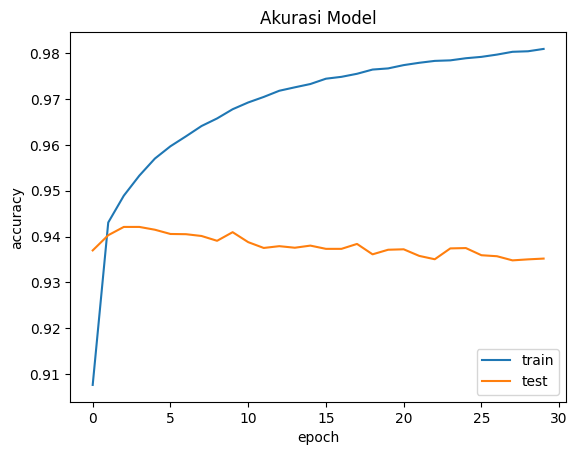

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

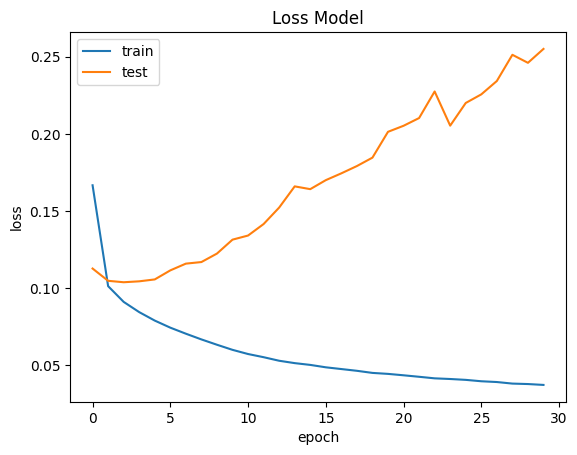

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()